# KNN - A Real Simple Algorithm

KNN stands for "K Nearest Neighbors" algorithm. It is a very simple, intuitive, and powerful method for both classification and regression. Classification is the task of assigning data points to discrete categories. Regression is the task of estimating a numerical value for a data point given a set of predictors.

Today, we will use KNN to classify iris species using the length and width of their sepals.

<img src="http://suruchifialoke.com/img/ML/iris.png"></img>

-------

## Problem 1

Import our libraries. We are going to need collections, pandas (pd), matplotlib (plt), and numpy (np).

In [175]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Problem 2

Load the provided `iris.csv` file into a dataframes. For consistency, call it `irisDF`. 

In [176]:
irisDF = pd.read_csv("./iris/iris.csv") 

## Problem 3

Use the `head()` method to print the first five rows of the dataframe. Now that we're starting to use modules, it will be helpful to distinguish functions from methods. A function is a command that stands on it's own. For example, `print("text")` is a function. So is `sum([1,2,3])`. A method is a function that is tied to a specific object. For example, we cannot write `head(irisDF)` because Python does not know what the function `head()` is. However, we can write `irisDF.head()` because there is a `head()` method built-in to Pandas data frame objects.

In [177]:
## Call head() on irisDF here.
irisDF.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.4,2.9,1.4,0.2,setosa
1,5.5,2.5,4.0,1.3,versicolor
2,5.7,2.9,4.2,1.3,versicolor
3,6.9,3.1,4.9,1.5,versicolor
4,6.5,2.8,4.6,1.5,versicolor


## Problem 4

Let's plot our data. Following the example here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html, plot the sepal length (x) and the sepal width (y).

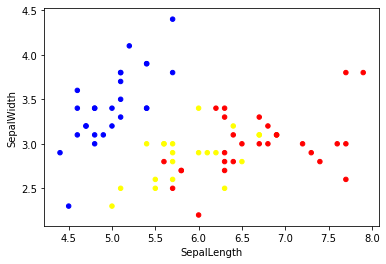

In [195]:
## STEP 1: Get the Species column from irisDF in a list.
species = irisDF.Species

## STEP 2: Use the set() function to get the unique species names.
species = list(set(irisDF.Species))

## STEP 3: Make a dictionary that maps species_name to colors 
## of your choice.
## You can hand-code this dictionary if you like.
colors = ["red", "yellow", "blue"]

d = {}
for idx, item in enumerate(species):
    d.update({item:colors[idx]})

## STEP 4: Make a new list as long as your dataframe
## where every entry is the color the corresponds
## to the iris species of that row.
colorList = []
for item in irisDF.Species:
    colorList.append(d[item])


## STEP 5: Plot PetalLength (x) and PetalWidth (y) where points are
## colored by your color list
r = irisDF.plot.scatter(x="SepalLength", y="SepalWidth", c=colorList)

## Problem 5

For KNN, we need a function that takes two numpy arrays and computes the Euclidean distance between them. Below, I've given you three tests. If your function computes the distance properly, all will return true.

In [196]:
def euclidean(x,y):
    """
    Input
        x: a 1-dimensional numpy array
        y: a 1-dimensional numpy array
    Output
        A single number, the euclidean distance between x and y
    """
    

    return(np.sqrt(np.sum((x - y)**2)))


In [197]:
## The following should print True True True
testX = np.array([0,0,0])
testY = np.array([1,0,0])
testZ = np.array([-10,0,0])
print(euclidean(testX, testY) == 1)
print(euclidean(testX, testZ) == 10)
print(euclidean(testY, testZ) == 11)

True
True
True


## Problem 6

Now we need a function to compute a lot of distances. In particular, we want to input x, a single point, and Y, a 2 dimensional numpy array of many points (each point is a row). This next function should return a numpy array of the euclidean distance from x to each point in Y.

In [198]:
def many_distances(x,Y):
    
    """
    Input
        x: a single point as a numpy array
        Y: a 2-dimensional numpy array
    Output
        a numpy array of euclidean distances
    """
    result = np.zeros(Y.shape[0])
    for idx, pt in enumerate(Y):
        dist = euclidean(x, pt)
        result[idx] = dist
    return(result)


In [199]:
## The following line should return array([0., 1., 10.])
testX = np.array([0,0,0])
testY = np.array([1,0,0])
testZ = np.array([-10,0,0])
test_many_points = np.array([testX, testY, testZ])
many_distances(testX, test_many_points)

array([ 0.,  1., 10.])

## Problem 7

Now, we need to find the indices of the N smallest elements in a numpy array. In other words, we need a function that answers the question "given a numpy array, what are the indices of the N smallest elements?" We can use https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html to do this.

In [200]:
def closest_indices(dists, n):
    
    """
    Input
        dists: a numpy array of distances (1 dimensional)
        n: the number of lowest values to find
    Output
        a numpy array with the indexes in dists where the
        n lowest values are located.
    """
    arrIndexes = np.argsort(dists)    
    return(arrIndexes[0:n])

In [201]:
## This should return array([0,3])
test_dist = np.array([0,5,4,2,9])
test_n = 2
closest_indices(test_dist, test_n)

array([0, 3])

## Problem 8

Now, we need a function that takes a numpy array and a list and returns only the elements of the list whose index values are in the numpy array.

In [202]:
def get_values_by_index(indices, values):
    """
    Input
        indices: a numpy array of indices
        values: a list of values
    Output
        a list of elements from values whose indexes
        are the values in indices
    """
    arr = np.array(values)
    return(arr[indices])


In [203]:
## This should return ["red","blue"]
test_indices = np.array([0,2])
test_colors = ["red","green","blue","purple","orange"]
print(get_values_by_index(test_indices, test_colors))

['red' 'blue']


## Problem 9

Now we need a function that takes a list as input and returns that list's most common element. If there is a tie, it can return any of the most common values.

In [204]:
def get_mode(values):
    """
    Input
        values: a lists of values
    Output
        the most common value in the list.
        If there's a tie, break it any way you want to.
    """
    counts = np.unique(values, return_counts=True)
    cnt = np.argsort(counts[1])   
    colorIndex = cnt[len(cnt) -1]
    label = counts[0][colorIndex]    
    return(label)

In [205]:
## This should return "green"
get_mode(["green","orange","red","green"])

'green'

## Problem 10

Let's write our KNN function! This function will take in a set of unlabeled points for which we want to make predictions (the test set), a set of labeled points that we use to "train" the model, and a set of labels associated with the training data. Also, it will accept a value for K - how many nearest neighbors to use for estimating class membership.

The steps should be the following:

1. Initialize an empty list that we will fill with our predictions.
2. Iterate over our tests set rows (points).
3. Compute the distances between each test point and all training points.
4. Find the indices of the k nearest points.
5. Get the training labels (species) associated with each of the k index values.
6. Find the most common label associated with the k values.
7. Add the most common label to our prediction list.
8. Return the list of predictions.

In [206]:
def knn(test, train, labels, k=1):
    """
    Input
        test: A 2-D numpy array of points (rows) and features (cols)
        train: A 2-D numpy array of points (rows) and features (cols)
        labels: A list of labels associated with train points
    Output
        A list of best guesses for the test labels
    """
    output = []
    for pt in test:
        dists = many_distances(pt,train)
        label_indices = closest_indices(dists, k)
        labelSet = get_values_by_index(label_indices, labels)        
        predictedLabel = get_mode(labelSet)
        output.append(predictedLabel)     

    return(output)
        

In [207]:
## If we did this right, then you should be able to run the following:

## Load our test set
irisTestDF = pd.read_csv("./iris/iris_test.csv")

## Turn our test set variables into a numpy array
test_points = np.array(irisTestDF[["SepalLength","SepalWidth"]])

## Turn our training set variables into a numpy array
train_points = np.array(irisDF[["SepalLength","SepalWidth"]])

## Compute the knn predictions for our test points
results = knn(test_points, train_points, irisDF["Species"], k=3)

## Check out our sweet list of results
print(results)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor']


## Problem 11

Plot the predicted values and the true values. To do this, follow these steps:

1. Make a new list called `predicted_colors` like we did in Problem 4 where we replace our `results` values from problem 10 with their associated colors.
2. Make a list called `true_values` that contains the values from `irisTestDF.Species`.
3. Make a new list called `true_colors` where we replace the `true_values` species names with their associated colors.
4. Plot a scatterplot of `irisTestDF.SepalLength` and `irisTestDF.SepalWidth` colored by `true_colors`.
5. Plot a scatterplot of `irisTestDF.SepalLength` and `irisTestDF.SepalWidth` colored by `predicted_colors`.

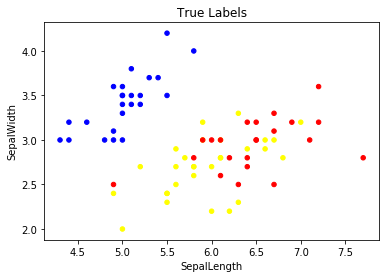

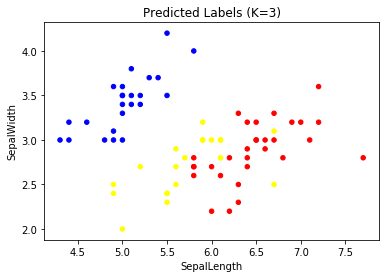

In [208]:
predicted_colors = []
for r in results:
    predicted_colors.append(d[r])
    
true_values = []
for r in irisTestDF.Species:
    true_values.append(d[r])
    
r1 = irisTestDF.plot.scatter(x="SepalLength", y="SepalWidth", c=true_values, title="True Labels")
r2 = irisTestDF.plot.scatter(x="SepalLength", y="SepalWidth", c=predicted_colors, title="Predicted Labels (K=3)")

## Problem 12

Write a function that computes multiclass accuracy. Multiclass accuracy is just the percentage of observations (rows) that are classified correctly.

In [209]:
def multiclass_accuracy(truth,predictions):
    """
    Input
        truth: a list of true labels
        predictions: a list of predicted labels
    Output
        a single value - the multiclass accuracy
    """
    cmp = np.array(truth) == np.array(predictions)
    wrong = len(cmp[cmp == False])
    right = len(cmp[cmp == True])
    accuracy = right/(wrong + right)
    return(accuracy)

## Problem 13

Use our KNN function to classify irisTestDF 10 times, once each for:

* k = 1
* k = 2
* k = 3
* k = 4
* k = 5
* k = 6
* k = 7
* k = 8
* k = 9
* k = 10

Which one has the highest multiclass accuracy? 
<br>**K= 5 has the highest multiclass accuracy (78.7%).**

In [210]:
results1 = knn(test_points, train_points, irisDF["Species"], k=1)
results2 = knn(test_points, train_points, irisDF["Species"], k=2)
results3 = knn(test_points, train_points, irisDF["Species"], k=3)
results4 = knn(test_points, train_points, irisDF["Species"], k=4)
results5 = knn(test_points, train_points, irisDF["Species"], k=5)
results6 = knn(test_points, train_points, irisDF["Species"], k=6)
results7 = knn(test_points, train_points, irisDF["Species"], k=7)
results8 = knn(test_points, train_points, irisDF["Species"], k=8)
results9 = knn(test_points, train_points, irisDF["Species"], k=9)
results10 = knn(test_points, train_points, irisDF["Species"], k=10)

In [211]:
print("K=1:",'{:.1%}'.format(multiclass_accuracy(results1,irisTestDF["Species"])))
print("K=2:",'{:.1%}'.format(multiclass_accuracy(results2,irisTestDF["Species"])))
print("K=3:",'{:.1%}'.format(multiclass_accuracy(results3,irisTestDF["Species"])))
print("K=4:",'{:.1%}'.format(multiclass_accuracy(results4,irisTestDF["Species"])))
print("K=5:",'{:.1%}'.format(multiclass_accuracy(results5,irisTestDF["Species"])))
print("K=6:",'{:.1%}'.format(multiclass_accuracy(results6,irisTestDF["Species"])))
print("K=7:",'{:.1%}'.format(multiclass_accuracy(results7,irisTestDF["Species"])))
print("K=8:",'{:.1%}'.format(multiclass_accuracy(results8,irisTestDF["Species"])))
print("K=9:",'{:.1%}'.format(multiclass_accuracy(results9,irisTestDF["Species"])))
print("K=10:",'{:.1%}'.format(multiclass_accuracy(results10,irisTestDF["Species"])))

K=1: 72.0%
K=2: 68.0%
K=3: 73.3%
K=4: 74.7%
K=5: 78.7%
K=6: 69.3%
K=7: 72.0%
K=8: 68.0%
K=9: 74.7%
K=10: 73.3%
